АДАБОСТ РЕГРЕСОР
Середньоквадратична помилка: 1.18
Пояснена дисперсія: 0.47


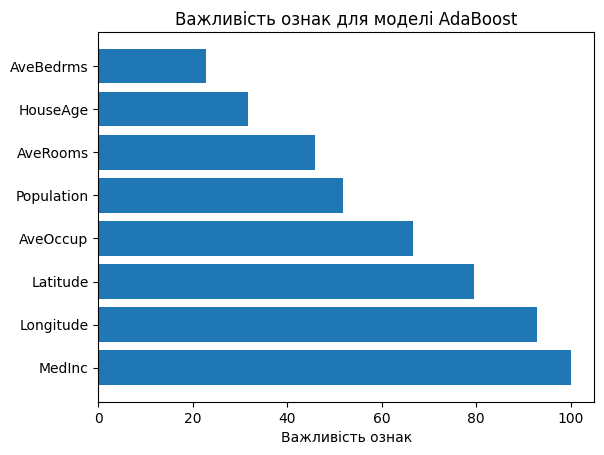

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Завантаження даних з Каліфорнійським житлом
housing = fetch_california_housing()

# Перемішування даних
X, y = shuffle(housing.data, housing.target, random_state=7)

# Розбиваємо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Модель на основі регресора AdaBoost
regressor = AdaBoostRegressor(
  DecisionTreeRegressor(max_depth=4),
  n_estimators=400, random_state=7)
regressor.fit(X_train, y_train)

# Оцінка ефективності регресора
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("АДАБОСТ РЕГРЕСОР")
print("Середньоквадратична помилка:", round(mse, 2))
print("Пояснена дисперсія:", round(evs, 2))

# Отримуємо важливість ознак
feature_importances = regressor.feature_importances_
feature_names = housing.feature_names

# Нормалізуємо важливість ознак
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# Сортуємо ознаки за важливістю
index_sorted = np.argsort(feature_importances)[::-1] # Sort in descending order

# Розміщення міток уздовж осі X
pos = np.arange(index_sorted.shape[0]) + 0.5

# Побудова стовпчастої діаграми
plt.figure()
plt.barh(pos, feature_importances[index_sorted], align='center')
plt.yticks(pos, np.array(feature_names)[index_sorted]) # Use feature names correctly
plt.xlabel('Важливість ознак')
plt.title('Важливість ознак для моделі AdaBoost')
plt.show()
